# TPE SUR LES DIFFERENTES ERREURS
### Liste des Membres du groupe : 

- **KEMBOU FOSSO RICHEL : 22U2118**
- **KELODJOU DJOMO NAFISSATOU IVANA : 22T2894**
- **MEFFO TAHAFO LEA JECY : 22U2194**
- **TSEMEGNE MARTIN YVAN : 22U2080**

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x, y, z = sp.symbols('x y z')
N, i = sp.symbols('N i', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)
a, b = sp.symbols('a b', real=True)

## ERREUR QUADRATIQUE MOYENNE

L'Erreur Quadratique Moyenne (MSE, de l'anglais Mean Squared Error) est une métrique utilisée pour évaluer la performance des modèles de régression, représentant la moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.Elle est donnée par

In [3]:
EQM = (1 / N )* sp.summation((y - y_hat)**2 ,(i, 1, N))
sp.pprint(EQM.simplify())

  N                    
 ___                   
 ╲                     
  ╲                   2
  ╱   (y(i) - yₕₐₜ(i)) 
 ╱                     
 ‾‾‾                   
i = 1                  
───────────────────────
           N           


### 1.Fournissons l expression du  gradient

In [4]:
i = 0

grad_mse = sp.diff(EQM, y_hat)
print("Le gradient de cette erreur sans la somme est  : ", end="")
sp.pprint(grad_mse.simplify())

Le gradient de cette erreur sans la somme est  :     N                    
   ___                   
   ╲                     
    ╲                    
2⋅  ╱   (-y(i) + yₕₐₜ(i))
   ╱                     
   ‾‾‾                   
  i = 1                  
─────────────────────────
            N            


### 2.Etude de la convexité de l'erreur quadratique moyenne

In [5]:
import sympy as sp

# Définition des symboles
N, i = sp.symbols('N i', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)

# Fonction coût EQM (Erreur Quadratique Moyenne)
EQM = (1 / N) * sp.summation((y - y_hat)**2, (i, 1, N))

# Gradient (première dérivée par rapport à y_hat)
grad_mse = sp.diff(EQM, y_hat)

# Hessienne (deuxième dérivée par rapport à y_hat)
hess_mse = sp.diff(grad_mse, y_hat)

print("Gradient : ")
sp.pprint(grad_mse.simplify())

print("\nDérivée seconde (Hessienne en 1D) : ")
sp.pprint(hess_mse.simplify())

# Vérification de la convexité : la dérivée seconde doit être >= 0
is_convex = sp.simplify(hess_mse) >= 0
print("\nEst ce que cette fonction est convexe ?", is_convex)


Gradient : 
    N                    
   ___                   
   ╲                     
    ╲                    
2⋅  ╱   (-y(i) + yₕₐₜ(i))
   ╱                     
   ‾‾‾                   
  i = 1                  
─────────────────────────
            N            

Dérivée seconde (Hessienne en 1D) : 
2

Est ce que cette fonction est convexe ? True



### Justification de la Convexité

Le résultat du calcul de la dérivée seconde est :

$$\frac{\partial^2 \text{EQM}}{\partial \mathbf{\hat{y}}^2} = \frac{\partial}{\partial \mathbf{\hat{y}}} \left( \frac{2}{N} \sum_{i=1}^{N} (\mathbf{\hat{y}} - \mathbf{y}) \right)$$

$$= \frac{2}{N} \sum_{i=1}^{N} \frac{\partial}{\partial \mathbf{\hat{y}}} (\mathbf{\hat{y}} - \mathbf{y}) = \frac{2}{N} \sum_{i=1}^{N} 1 = \frac{2}{N} \times N = 2$$

Comme la dérivée seconde de l'Erreur Quadratique Moyenne par rapport à $\mathbf{\hat{y}}$ est **$2$**, qui est une constante **strictement positive** ($2 > 0$), la fonction EQM est **strictement convexe** par rapport à $\mathbf{\hat{y}}$.



### Propriétés de Convexité étudiées

La convexité de l'EQM est établie en utilisant la propriété suivante :

1.  **Caractérisation de second ordre de la convexité (Propriété fondamentale)** :
    * Pour une fonction $f$ deux fois dérivable (de classe $\mathcal{C}^2$) à une seule variable, $f$ est convexe si et seulement si sa dérivée seconde est positive : $f''(x) \ge 0$.
    * Dans notre cas, $\frac{\partial^2 \text{EQM}}{\partial \mathbf{\hat{y}}^2} = 2 > 0$, ce qui garantit la **stricte convexité** de l'erreur quadratique moyenne.

## 3 Représentons les courbes de l'erreur quadratique Moyenne ainsi que l'équation de la tangente à l ellipse au point de coordonnées données.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [7]:
# =============================================================================
# CHARGEMENT ET PRÉPARATION DES DONNÉES (CORRECTION DÉFINITIVE)
# =============================================================================

print("=== TENTATIVE DE CHARGEMENT ET VÉRIFICATION ===")

# Hypothèse la plus probable: En-tête présent (X1, X2, Y_Cible) et séparateur = virgule (',')
try:
    # Tente de charger le fichier en supposant l'en-tête (par défaut) et la virgule comme séparateur.
    data = pd.read_csv('regression_data.csv', sep=',')
    print("Chargement réussi avec séparateur ',' et en-tête.")

except Exception as e:
    # Deuxième hypothèse: En-tête présent (par la première ligne) et séparateur = espaces multiples
    print(f"Erreur avec la virgule ({e}). Tentative avec séparateur d'espaces multiples...")
    try:
        # Utilise sep='\s+' (un ou plusieurs espaces) et engine='python' pour une flexibilité maximale
        data = pd.read_csv('regression_data.csv', sep='\s+', engine='python')
        print("Chargement réussi avec séparateur d'espaces multiples et en-tête.")
    except Exception as e2:
        print(f"ERREUR FATALE: Le fichier n'a pu être chargé. Erreur: {e2}")
        exit() # Arrête le script si le chargement échoue

# Renommer la colonne cible (si elle n'est pas déjà 'y')
if 'Y_Cible' in data.columns:
    data = data.rename(columns={'Y_Cible': 'y'})
elif 'y' not in data.columns:
    # Cas où il n'y a pas d'en-tête clair, mais seulement des indices numériques.
    # On suppose que la dernière colonne est 'y'.
    if len(data.columns) >= 3:
         data.columns = ['X1', 'X2', 'y']
         print("Noms de colonnes forcés à X1, X2, y.")

# VÉRIFICATION
print("=== STRUCTURE DES DONNÉES ===")
print(data.head())
print(f"\nDimensions des données : {data.shape}")
print(f"Noms des colonnes : {list(data.columns)}")

if 'X1' not in data.columns or 'X2' not in data.columns or 'y' not in data.columns:
    print("\nERREUR D'ANALYSE: Les noms de colonnes X1, X2 ou y sont manquants. Arrêt du script.")
    exit()

print("\n=== STATISTIQUES DES DONNÉES ===")
print(data.describe())


=== TENTATIVE DE CHARGEMENT ET VÉRIFICATION ===
Chargement réussi avec séparateur ',' et en-tête.
=== STRUCTURE DES DONNÉES ===
         X1        X2          y
0 -1.254599  2.722448  -4.965005
1  4.507143 -3.012843  29.467574
2  2.319939 -4.944779  27.030067
3  0.986585  3.154614  14.040252
4 -3.439814  2.068573  -5.033671

Dimensions des données : (70, 3)
Noms des colonnes : ['X1', 'X2', 'y']

=== STATISTIQUES DES DONNÉES ===
              X1         X2          y
count  70.000000  70.000000  70.000000
mean   -0.325178  -0.081019   9.481944
std     3.039528   2.929238  12.085958
min    -4.794155  -4.944779 -14.602372
25%    -3.123634  -2.660783   0.108284
50%    -0.639512   0.011831   6.218486
75%     2.260136   2.684216  19.347750
max     4.868869   4.717821  30.300685



VISUALISATION DES DONNÉES


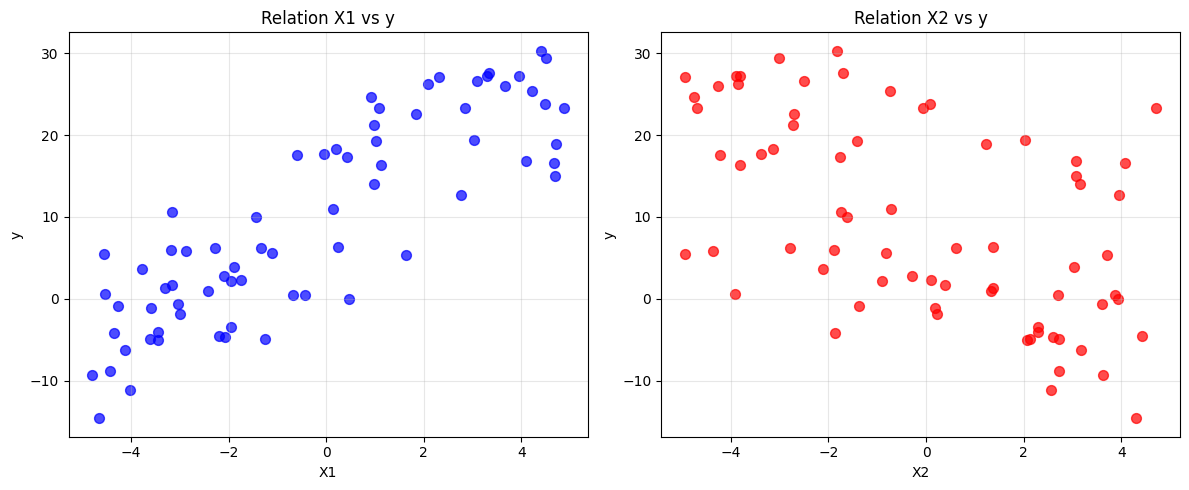

In [23]:
# =============================================================================
# 1. VISUALISATION EXPLORATOIRE DES DONNÉES (seulement 2 graphiques)
# =============================================================================

print("\n" + "="*50)
print("VISUALISATION DES DONNÉES")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphique X1 vs y
axes[0].scatter(data['X1'], data['y'], alpha=0.7, color='blue', s=50)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('y')
axes[0].set_title('Relation X1 vs y')
axes[0].grid(True, alpha=0.3)

# Graphique X2 vs y
axes[1].scatter(data['X2'], data['y'], alpha=0.7, color='red', s=50)
axes[1].set_xlabel('X2')
axes[1].set_ylabel('y')
axes[1].set_title('Relation X2 vs y')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### a) Représentons les courbes de l'erreur quadratique Moyenne

#### Explication:
ce graphique utilise les coefficients du modèle (β1​ et β2​) sur les axes pour montrer la valeur de l'erreur (EQM) sur le troisième axe.

Le code commence par récupérer les coefficients (β0​,β1​,β2​) déjà calculés par la méthode des moindres carrés lors de l'ajustement du modèle linéaire (model_linear.fit)

    Axe X : B1_grid → Valeurs du coefficient β₁

    Axe Y : B2_grid → Valeurs du coefficient β₂

    Axe Z : EQM_grid → Valeur de l'erreur EQM

Coordonnées du point rouge :

    X : b1_opt (coefficient optimal pour X1)

    Y : b2_opt (coefficient optimal pour X2)

    Z : mse_linear (valeur minimale de l'EQM)

Ainsi donc,La courbe EQM montre visuellement comment l'erreur varie avec les paramètres du modèle. C'est une surface convexe avec un minimum unique correspondant aux coefficients optimaux trouvés par la régression linéaire

β₀ - INTERCEPT (Ordonnée à l'origine)

    Définition : Valeur de y quand X₁ = 0 et X₂ = 0

    Interprétation : La "valeur de base" ou "niveau de référence"
β₁ - COEFFICIENT DE X₁

    Définition : Impact d'une unité de X₁ sur y

    Interprétation : "Quand X₁ augmente de 1, y change de β₁"
β₂ - COEFFICIENT DE X₂

    Définition : Impact d'une unité de X₂ sur y

    Interprétation : "Quand X₂ augmente de 1, y change de β₂"
Les coefficients β₁ et β₂ déterminent l’inclinaison du plan dans les directions X₁ et X₂. β₀ détermine à quelle hauteur ce plan coupe l’axe des y.

## b.Trouver l équation de la tangente à l eclipse au point de coordonnées données

In [11]:
# =============================================================================
# 2. RÉGRESSION LINÉAIRE MULTIPLE
# =============================================================================

print("\n" + "="*50)
print("RÉGRESSION LINÉAIRE MULTIPLE")
print("="*50)

X = data[['X1', 'X2']]
y = data['y']

model_linear = LinearRegression()
model_linear.fit(X, y)

y_pred_linear = model_linear.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)

print(f"Coefficients : {model_linear.coef_}")
#print(f"Intercept : {model_linear.intercept_:.4f}")
print(f"MSE : {mse_linear:.4f}")
print(f"Équation : y = {model_linear.coef_[0]:.4f}*X1 + {model_linear.coef_[1]:.4f}*X2 + {model_linear.intercept_:.4f}")


RÉGRESSION LINÉAIRE MULTIPLE
Coefficients : [ 3.20480763 -1.86020681]
MSE : 8.7041
Équation : y = 3.2048*X1 + -1.8602*X2 + 10.3734


Ici,
* nous préparons les données
* puis,nous créons un modèle de régression linéaire vide 
* ensuite *.fit(X, y) * nous entraînons le modèle pour trouver les meilleurs coefficients c est à dire,: Le modèle cherche β₀, β₁, β₂ qui minimisent 
* et enfin nous passons à la prédiction et l evaluation (Ce sont les VRAIES valeurs optimales trouvées par le modèle sur TOUTES les données.)

In [35]:
# =============================================================================
# REPRÉSENTATION DES COURBES DE MSE ET TANGENTES
# =============================================================================

print("\n" + "="*50)
print("COURBES DE MSE ET TANGENTES")
print("="*50)

# Fonction pour calculer l'EQM pour différents coefficients
def calculate_mse_for_coefficient(b1_test, b0_fixed, b2_fixed, X_data, y_data):
    """Calcule l'EQM pour une valeur donnée de b1"""
    y_pred = b0_fixed + b1_test * X_data['X1'] + b2_fixed * X_data['X2']
    return np.mean((y_data - y_pred)**2)

# Points pour l'analyse (autour des coefficients optimaux)
b0_opt = model_linear.intercept_
b1_opt = model_linear.coef_[0]
b2_opt = model_linear.coef_[1]

# 1. Courbe EQM en fonction de β1 (en fixant β0 et β2)
b1_range = np.linspace(b1_opt - 2, b1_opt + 2, 100)
mse_values_b1 = [calculate_mse_for_coefficient(b1, b0_opt, b2_opt, data, data['y']) 
                for b1 in b1_range]

# 2. Courbe EQM en fonction de β2 (en fixant β0 et β1)
b2_range = np.linspace(b2_opt - 2, b2_opt + 2, 100)
mse_values_b2 = [calculate_mse_for_coefficient(b1_opt, b0_opt, b2, data, data['y']) 
                for b2 in b2_range]
# =============================================================================
# CALCUL SYMBOLIQUE DES TANGENTES
# =============================================================================

# Définition symbolique de l'EQM
b0_sym, b1_sym, b2_sym = sp.symbols('beta_0 beta_1 beta_2')
y_sym, X1_sym, X2_sym = sp.symbols('y X1 X2')

# EQM pour un point unique (simplifié)
EQM_point = (y_sym - (b0_sym + b1_sym * X1_sym + b2_sym * X2_sym))**2

# Dérivées partielles
dE_dB1 = sp.diff(EQM_point, b1_sym)
dE_dB2 = sp.diff(EQM_point, b2_sym)

print("\nDérivées partielles symboliques (FORMULES GÉNÉRALES):")
print("∂E/∂β₁ =", dE_dB1)
print("∂E/∂β₂ =", dE_dB2)



COURBES DE MSE ET TANGENTES

Dérivées partielles symboliques (FORMULES GÉNÉRALES):
∂E/∂β₁ = -2*X1*(-X1*beta_1 - X2*beta_2 - beta_0 + y)
∂E/∂β₂ = -2*X2*(-X1*beta_1 - X2*beta_2 - beta_0 + y)


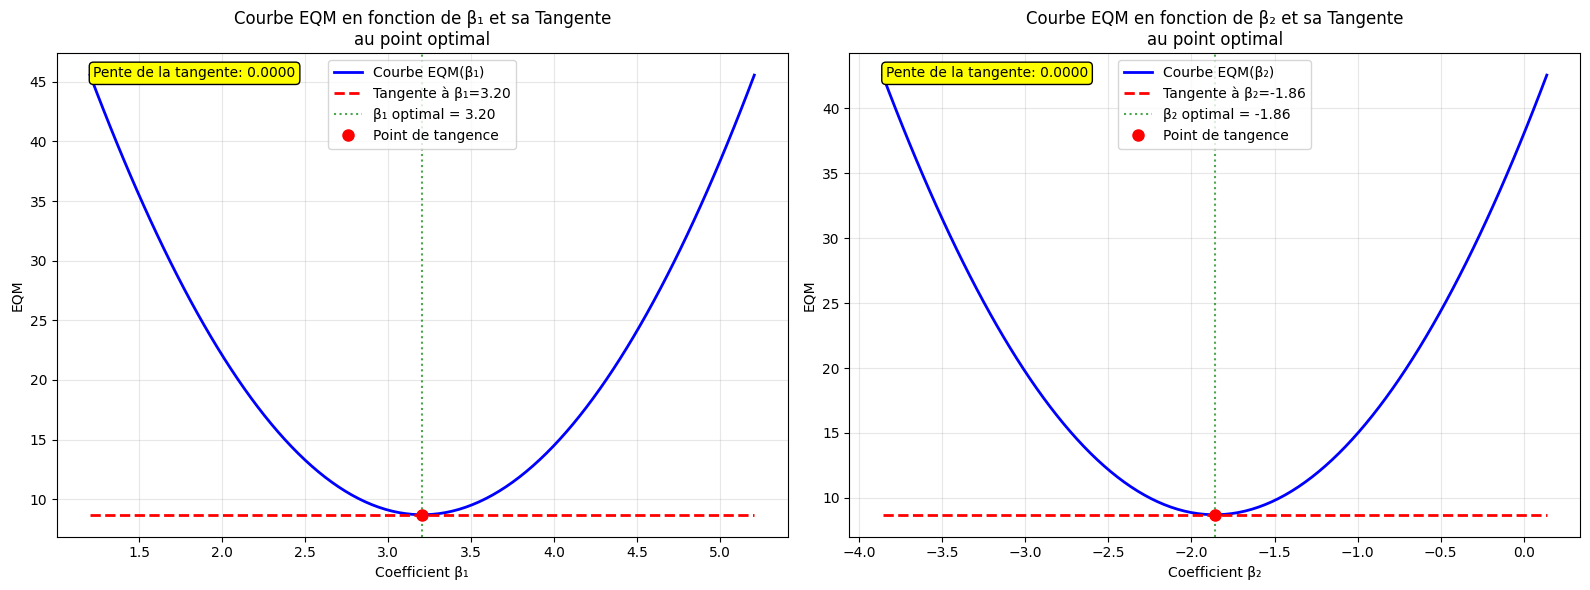

In [34]:


# =============================================================================
# REPRÉSENTATION GRAPHIQUE DES COURBES ET TANGENTES
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ==================== GRAPHIQUE 1: TANGENTE EN FONCTION DE β1 ====================

# Point de tangence pour β1
b1_tangent = b1_opt
mse_tangent_b1 = calculate_mse_for_coefficient(b1_tangent, b0_opt, b2_opt, data, data['y'])

# Calcul de la pente (dérivée) au point b1_tangent
# Pour simplifier, on approxime numériquement la dérivée
h = 0.001
mse_plus = calculate_mse_for_coefficient(b1_tangent + h, b0_opt, b2_opt, data, data['y'])
mse_minus = calculate_mse_for_coefficient(b1_tangent - h, b0_opt, b2_opt, data, data['y'])
slope_b1 = (mse_plus - mse_minus) / (2 * h)

# Équation de la tangente : y = pente*(x - x0) + y0
tangent_b1 = slope_b1 * (b1_range - b1_tangent) + mse_tangent_b1

# Tracé
ax1.plot(b1_range, mse_values_b1, 'b-', linewidth=2, label='Courbe EQM(β₁)')
ax1.plot(b1_range, tangent_b1, 'r--', linewidth=2, label=f'Tangente à β₁={b1_tangent:.2f}')
ax1.axvline(x=b1_tangent, color='green', linestyle=':', alpha=0.7, label=f'β₁ optimal = {b1_tangent:.2f}')
ax1.plot(b1_tangent, mse_tangent_b1, 'ro', markersize=8, label='Point de tangence')

ax1.set_xlabel('Coefficient β₁')
ax1.set_ylabel('EQM')
ax1.set_title('Courbe EQM en fonction de β₁ et sa Tangente\nau point optimal')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.text(0.05, 0.95, f'Pente de la tangente: {slope_b1:.4f}', 
         transform=ax1.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))


# ==================== GRAPHIQUE 2: TANGENTE EN FONCTION DE β2 ====================

# Point de tangence pour β2
b2_tangent = b2_opt
mse_tangent_b2 = calculate_mse_for_coefficient(b1_opt, b0_opt, b2_tangent, data, data['y'])

# Calcul de la pente (dérivée) au point b2_tangent
mse_plus_b2 = calculate_mse_for_coefficient(b1_opt, b0_opt, b2_tangent + h, data, data['y'])
mse_minus_b2 = calculate_mse_for_coefficient(b1_opt, b0_opt, b2_tangent - h, data, data['y'])
slope_b2 = (mse_plus_b2 - mse_minus_b2) / (2 * h)

# Équation de la tangente
tangent_b2 = slope_b2 * (b2_range - b2_tangent) + mse_tangent_b2

# Tracé
ax2.plot(b2_range, mse_values_b2, 'b-', linewidth=2, label='Courbe EQM(β₂)')
ax2.plot(b2_range, tangent_b2, 'r--', linewidth=2, label=f'Tangente à β₂={b2_tangent:.2f}')
ax2.axvline(x=b2_tangent, color='green', linestyle=':', alpha=0.7, label=f'β₂ optimal = {b2_tangent:.2f}')
ax2.plot(b2_tangent, mse_tangent_b2, 'ro', markersize=8, label='Point de tangence')

ax2.set_xlabel('Coefficient β₂')
ax2.set_ylabel('EQM')
ax2.set_title('Courbe EQM en fonction de β₂ et sa Tangente\nau point optimal')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'Pente de la tangente: {slope_b2:.4f}', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))

plt.tight_layout()
plt.show()




In [39]:

# =============================================================================
# ÉQUATIONS DES TANGENTES
# =============================================================================

print("\n" + "="*50)
print("ÉQUATIONS DES TANGENTES (Approximmation locales)")
print("="*50)

print(f"Équation de la tangente pour β₁ au point ({b1_opt:.4f}, {mse_tangent_b1:.4f}):")
print(f"EQM(β₁) ≈ {mse_tangent_b1:.4f} + {slope_b1:.4f}·(β₁ - {b1_opt:.4f})")

print(f"\nÉquation de la tangente pour β₂ au point ({b2_opt:.4f}, {mse_tangent_b2:.4f}):")
print(f"EQM(β₂) ≈ {mse_tangent_b2:.4f} + {slope_b2:.4f}·(β₂ - {b2_opt:.4f})")

#print(f"\nÉquation du plan tangent au point (β₁={b1_opt:.4f}, β₂={b2_opt:.4f}):")
#print(f"EQM(β₁,β₂) ≈ {z0:.4f} + {A:.4f}·(β₁ - {b1_opt:.4f}) + {B:.4f}·(β₂ - {b2_opt:.4f})")




ÉQUATIONS DES TANGENTES (Approximmation locales)
Équation de la tangente pour β₁ au point (3.2048, 8.7041):
EQM(β₁) ≈ 8.7041 + 0.0000·(β₁ - 3.2048)

Équation de la tangente pour β₂ au point (-1.8602, 8.7041):
EQM(β₂) ≈ 8.7041 + 0.0000·(β₂ - -1.8602)
